In [11]:
%pylab inline

from matplotlib import rc

fig_font = {'family':'sans-serif','sans-serif':['Helvetica'],
           'serif':['Helvetica'],'size':14}
rc('font',**fig_font)
rc('legend',fontsize=14, handletextpad=0.5)
rc('text', usetex=True)
rc('figure', figsize=(3.33,2.22))
#  rc('figure.subplot', left=0.10, top=0.90, bottom=0.12, right=0.95)
rc('axes', linewidth=0.5, color_cycle= ['#496ee2', '#8e053b', 'm', '#ef9708', 'g', 'c'])
rc('lines', linewidth=1)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [12]:
def fig_to_file(fig, filename, ext):
    fig.savefig("graphs/%s.%s" % (filename, ext), format=ext, bbox_inches='tight')

In [16]:
import csv
latency_all=[]
for client in range(0,2):
    with open('results/latency_'+str(client)+'.csv', newline='') as csvfile:
        for row in csv.reader(csvfile):
            latency_all.append(int(row[2])/1000/1000)
latency_all.sort()
print(latency_all)

[0.891676, 0.9522970000000001, 0.970876, 1.000087, 1.0405419999999999, 1.0465689999999999, 1.073108, 1.110375, 1.112069, 1.118111, 1.159818, 1.230534, 1.231825, 1.2390619999999999, 1.247557, 1.254551, 1.289954, 1.305032, 1.307258, 1.370447, 1.5303820000000001, 1.58233, 1.601131, 1.6482860000000001]


In [17]:
tcdf_y=[]
size=len(latency_all)
for y in range (1,size+1):
    tcdf_y.append(y*100.0/size)

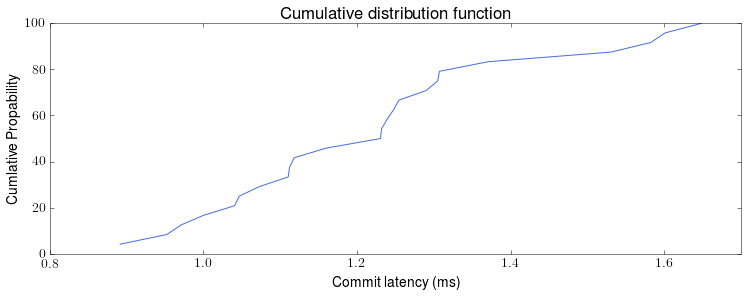

In [18]:
# plot simple CFD
fig = plt.figure(figsize=[12,4])
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.set_xlabel('Commit latency (ms)')
axes.set_ylabel('Cumlative Propability')
axes.set_title('Cumulative distribution function')

axes.plot(latency_all, tcdf_y)
